In [ ]:
5. Naive Bayes
It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. 
In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is 
unrelated to the presence of any other feature. 
For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. 
Even if these features depend on each other or upon the existence of the other features, 
a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

Naive Bayesian model is easy to build and particularly useful for very large data sets. 
Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.
 
Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). 
Look at the equation below:
Bayes_rule


Here,

P(c|x) is the posterior probability of class (target) given predictor (attribute).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.
Example: Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’. 
    Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

Step 1: Convert the data set to frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

Bayes_4

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. 
    The class with the highest posterior probability is the outcome of prediction.

Problem: Players will play if weather is sunny, is this statement is correct?

We can solve it using above discussed method, so P(Yes | Sunny) = (P( Sunny | Yes) * P(Yes)) / P (Sunny)

Here we have P (Sunny | Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. 
This algorithm is mostly used in text classification and with problems having multiple classes.

NB/ In Gaussian naive Bayes classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

         pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


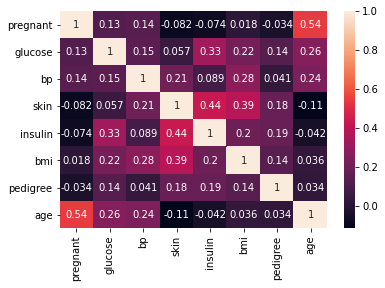

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sn


column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

dataset = pd.read_csv('pima-indians-diabetes.csv', header=None, names=column_names)

print(dataset.describe(), sep="\n")
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

## split X and y into training and testing sets with our test data taking 25% & train data 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

#view correlation
sn.heatmap(X.corr(), annot = True)

#create a model & fit it
model = GaussianNB().fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)
# print(y_pred)

#Feature scaling
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

#model evaluation
confusion_matrix = confusion_matrix(y_test, y_pred)
print (confusion_matrix)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

dataset.head()